In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter, AutoMinorLocator
%matplotlib inline

In [31]:
font = {"size"   : 20}
plt.rc("font", **font)
plt.rcParams['ytick.right']

df = pd.read_csv("int_ratio.data", skiprows = 1, 
                 header = None, 
                 delimiter=" ", 
                 names=range(35))


In [32]:
df = df.drop(df.columns[0], axis=1)
tdf = df.transpose()
tdf["layer"] = tdf.index
tdf.columns = ["bulk-half-tet", "bulk-full-tet",
               "bulk-half-int", "bulk-full-int",
               "surf-half-tet", "surf-full-tet",
               "surf-half-int", "surf-full-int", 
               "layer"]

col1 = tdf.pop("layer")
tdf.insert(0, "layer", col1)

In [33]:
tdf

,layer,bulk-half-tet,bulk-full-tet,bulk-half-int,bulk-full-int,surf-half-tet,surf-full-tet,surf-half-int,surf-full-int
1,1,36,36,36,36,36,36,36,36
2,2,36,36,36,36,36,36,36,36
3,3,18,36,18,36,17,36,18,34
4,4,18,0,18,1,21,0,20,9
5,5,18,36,18,33,13,36,13,18
6,6,18,0,18,4,24,1,25,23
7,7,18,36,18,31,12,31,9,11
8,8,18,0,19,7,25,11,30,27
9,9,18,36,13,26,8,16,3,6
10,10,18,2,32,24,33,31,35,34


In [34]:
kk = tdf.columns

kk
structures = list(tdf.columns[1::2])+list(tdf.columns[2::2])

print (structures)

structures = list(['bulk-full-tet',
 'bulk-full-int',
 'surf-full-tet',
 'surf-full-int',
 'bulk-half-tet',
 'bulk-half-int',
 'surf-half-tet',
 'surf-half-int'])

structures

['bulk-half-tet', 'bulk-half-int', 'surf-half-tet', 'surf-half-int', 'bulk-full-tet', 'bulk-full-int', 'surf-full-tet', 'surf-full-int']


['bulk-full-tet',
 'bulk-full-int',
 'surf-full-tet',
 'surf-full-int',
 'bulk-half-tet',
 'bulk-half-int',
 'surf-half-tet',
 'surf-half-int']

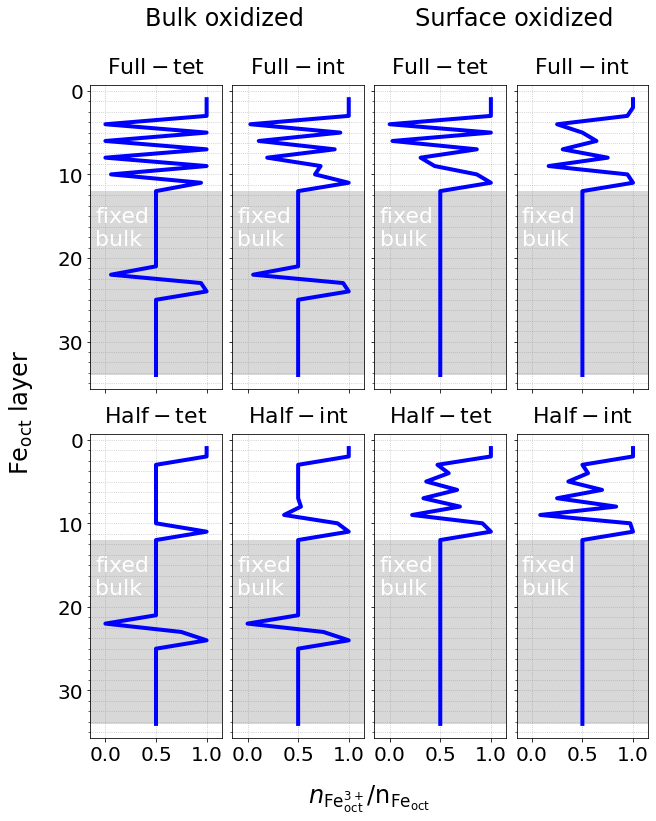

In [79]:

row = 0
col = 0

fig, axis = plt.subplots(2, 4, figsize=(10, 12), facecolor="w", 
                         sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.15, wspace=0.08)

axis[0, 0].set_xlim([-0.15, 1.15])
axis[0, 0].set_xticks([0, 0.5, 1.0])

axis[0, 0].invert_yaxis()

ml = AutoMinorLocator(8)
axis[0, 0].yaxis.set_minor_locator(ml)


axis[0, 1].set_ylabel(r"$\mathrm{Half-int}$", ha="center", fontsize=24, labelpad=20)
axis[1, 1].set_ylabel(r"$\mathrm{Full-int}$", ha="center", fontsize=24, labelpad=20)
axis[0, 1].yaxis.set_label_position("right")
axis[1, 1].yaxis.set_label_position("right")


axis[0, 0].set_title(r"$\mathrm{Full-tet}$", fontsize=22, pad=12)
axis[0, 1].set_title(r"$\mathrm{Full-int}$", fontsize=22, pad=12)
axis[0, 2].set_title(r"$\mathrm{Full-tet}$", fontsize=22, pad=12)
axis[0, 3].set_title(r"$\mathrm{Full-int}$", fontsize=22, pad=12)

axis[1, 0].set_title(r"$\mathrm{Half-tet}$", fontsize=22, pad=12)
axis[1, 1].set_title(r"$\mathrm{Half-int}$", fontsize=22, pad=12)
axis[1, 2].set_title(r"$\mathrm{Half-tet}$", fontsize=22, pad=12)
axis[1, 3].set_title(r"$\mathrm{Half-int}$", fontsize=22, pad=12)

for system in structures:
    axis[col, row].plot(tdf[system]/36, tdf["layer"], linewidth=4, color="blue")
    axis[col, row].yaxis.grid(color='gray', linestyle='dotted', alpha=0.5, which="minor")
    axis[col, row].yaxis.grid(color='gray', linestyle='dotted', alpha=0.5, which="major")
    axis[col, row].xaxis.grid(color='gray', linestyle='dotted', alpha=0.5)
    axis[col, row].axhspan(12, 34 , facecolor='grey', alpha=0.3)
    axis[col, row].text(-0.1, 18.5, 'fixed\nbulk', color='white', fontsize=22)

    row +=1
    if row == 4:
        row = 0
        col += 1

# Invisible plot for title declaration
ax0 = fig.add_subplot(111, frame_on=False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlabel(r"$n_{\mathrm{{Fe}_{oct}^{3+}}}/\mathrm{n_{{Fe}_{oct}}}$", labelpad=45, fontsize=24)
ax0.set_ylabel(r"Fe$_\mathrm{oct}$ layer", labelpad=55, fontsize=24)

ax2 = fig.add_subplot(221, frame_on=False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(r"Bulk oxidized", pad=60, fontsize=24)

ax3 = fig.add_subplot(222, frame_on=False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title(r"Surface oxidized", pad=60, fontsize=24)

plt.show()


In [80]:
fig.savefig('fe3_explicit_bulk_int.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('fe3_explicit_bulk_int.png', dpi=300.0,format='png', bbox_inches = "tight")

In [10]:
pwd

'/run/user/1000/gvfs/sftp:host=workpc,user=emre/home/emre/221215_formate_on_001_dbt/2_withBulk'